In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


import aurum
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = aurum.data.get_ohlcv('ABEV3.SA', DIST_ALVO=10)
df = aurum.ft.technical_indicators(df)

df = df.sort_values('Date')

TARGET = ['Alvo']

FEATURES = [
    'RSI_14',
    'EMA_9_DISTANCE',
]

In [3]:
PROP_TREINO = .75
TAMANHO_TREINO = int(len(df) * PROP_TREINO)

X_train = df.loc[:TAMANHO_TREINO, FEATURES]
y_train = df.loc[:TAMANHO_TREINO, TARGET]

X_test = df.loc[TAMANHO_TREINO:, FEATURES]
y_test = df.loc[TAMANHO_TREINO:, TARGET]

In [4]:
dtc = DecisionTreeClassifier(
    random_state=42,
    max_depth=2
)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.4194528875379939

In [6]:
resultados = df[TAMANHO_TREINO:].reset_index(drop=True)
resultados['PREDICOES'] = y_pred
resultados['RETORNO_MODELO'] = 1 + ((resultados['LEAK_Retorno']/5) * resultados['PREDICOES'])
resultados['RETORNO_BNH'] = 1 + ((resultados['LEAK_Retorno']/5))
resultados['RETORNO_ACUMULADO_MODELO'] = resultados['RETORNO_MODELO'].cumprod()
resultados['RETORNO_ACUMULADO_BNH'] = 1 + (df['Close'] - df.loc[0, 'Close'])/df.loc[0, 'Close']

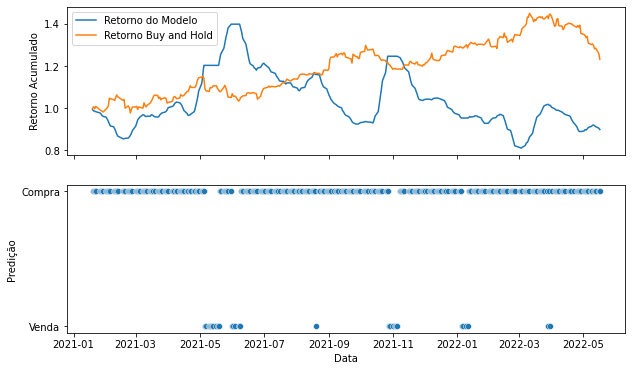

In [7]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,6))
sns.lineplot(
    y=resultados['RETORNO_ACUMULADO_MODELO'],
    x=resultados['Date'],
    ax=ax[0],
    label='Retorno do Modelo'
)

sns.lineplot(
    y=resultados['RETORNO_ACUMULADO_BNH'],
    x=resultados['Date'],
    ax=ax[0],
    label='Retorno Buy and Hold'
)

ax[0].set_ylabel('Retorno Acumulado')

sns.scatterplot(
    y=resultados['PREDICOES'],
    x=resultados['Date'],
    ax=ax[1],
    marker='o',
    linestyle='-'
)

ax[1].set_ylabel('Predição')
ax[1].set_xlabel('Data')
ax[1].set_yticks([0, 1])
ax[1].set_yticklabels(['Venda', 'Compra'])

plt.show()

NameError: name 'plot_tree' is not defined

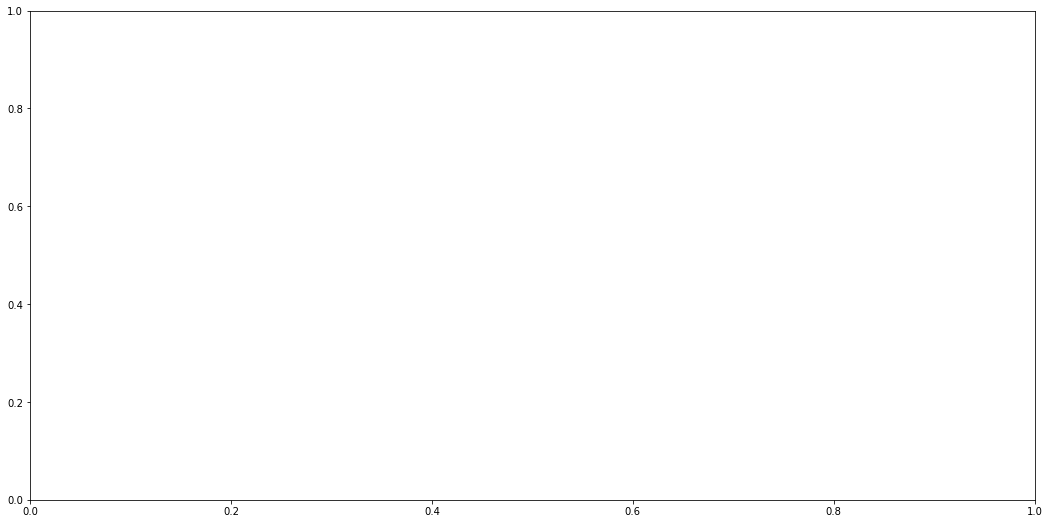

In [8]:
plt.subplots(figsize=(18,9))

plot_tree(dtc)
plt.show()